In [1]:
import matplotlib.pyplot as plt 
from PIL import Image as im

In [2]:
import os
import random

def infer_dir(model, dir_path, n):
    list_img = os.listdir(dir_path)[:n]
    random.shuffle(list_img)
    for img in list_img:
        img_path = dir_path + img
        print(img_path)
        out = model.predict_segmentation(
            inp= img_path,
            # out_fname="out.png"
        )

        plt.imshow(im.open(img_path))
        plt.show()
        plt.imshow(out)
        plt.show()

def infer_img(model, img_path):
    out = model.predict_segmentation(
        inp= img_path,
        out_fname="out.png"
    )

    plt.imshow(im.open(img_path))
    plt.show()
    plt.imshow(out)
    plt.show()

In [3]:
batch_size = 2

def train (model, checkpoint_path,epochs):
    model.train(
        train_images =  'datasets/ADEChallengeData2016/images/training/',
        train_annotations = 'datasets/ADEChallengeData2016/annotations/training/',

        val_images = 'datasets/ADEChallengeData2016/images/validation/',
        val_annotations = 'datasets/ADEChallengeData2016/images/validation/',

        batch_size = batch_size,
        val_batch_size = batch_size,

        steps_per_epoch= 20210 // batch_size,
        val_steps_per_epoch= 2000 // batch_size,

        # train_images = train_images,
        # train_annotations = train_annotations,
        checkpoints_path =  'tmp/' + checkpoint_path, 
        epochs= epochs,
    )

    #model.save("pretrained/" + 'ADE/' + checkpoint_path )
    model.save_weights("model_weights/" + 'ADE/' + checkpoint_path)

    #out = model.predict_segmentation(
    #inp="dataset1/images_prepped_test/0016E5_07965.png",
    #out_fname= checkpoint_path + "out.png"
    #)
    #plt.imshow(out)

    # evaluating the model 
    #print(model.evaluate_segmentation( inp_images_dir="dataset1/images_prepped_test/"  , annotations_dir="dataset1/annotations_prepped_test/" ) )

In [4]:
from keras_segmentation.models.segnet import resnet50_segnet

model_resnet = resnet50_segnet(n_classes=200 ,  input_height=416, input_width=608 ) 

checkpoint_path = 'model_weights/dataset1/model_resnet_1/'

# train(model_resnet, checkpoint_path, 2)

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-10-25 14:46:15.519647: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-25 14:46:15.520100: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


## Model pretrained on ADE

In [5]:
model_ade = resnet50_segnet(n_classes=200 ,  input_height=416, input_width=608 ) 
model_ade.load_weights('pretrained/ADE/model_resnet_1/')

../datasets/ADEChallengeData2016/images/validation/ADE_val_00000861.jpg


2022-10-25 14:46:18.748781: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-25 14:46:19.127638: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 818ms/step


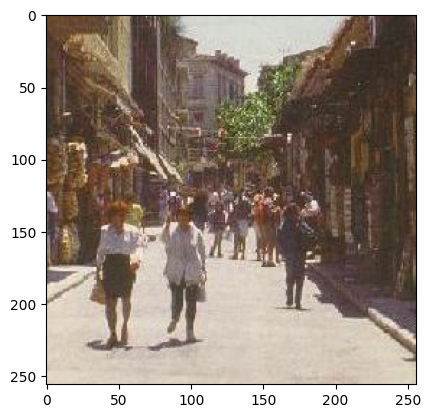

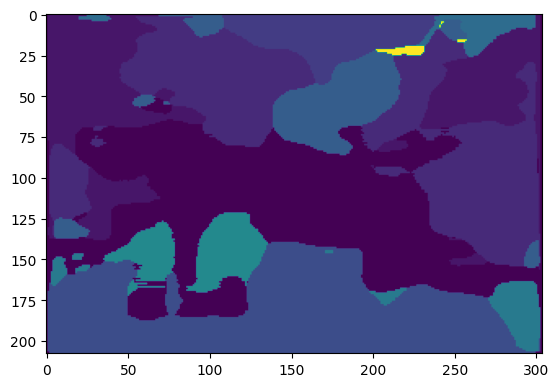

../datasets/ADEChallengeData2016/images/validation/ADE_val_00000875.jpg
1/1 [==============================] - 0s 86ms/step


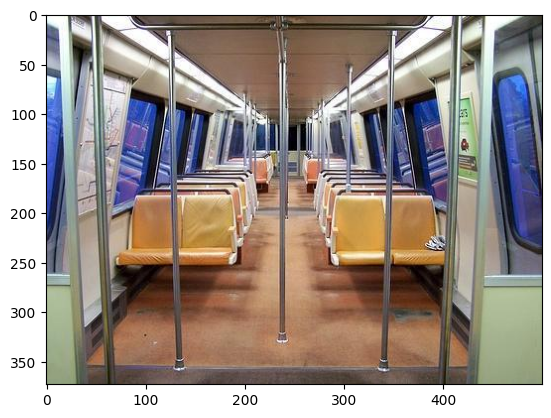

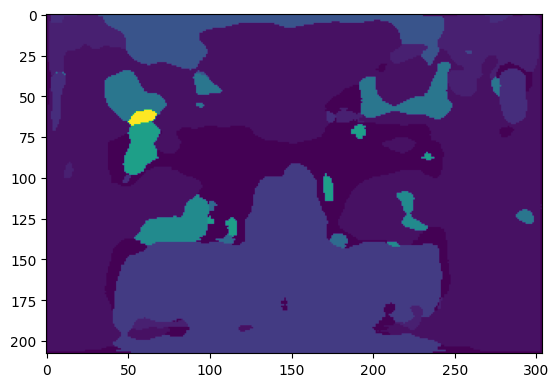

In [6]:
dir_path = '../datasets/ADEChallengeData2016/images/validation/'
infer_dir(model_ade, dir_path,2)

## Model pretrained on "archive"

In [7]:
model_archive = resnet50_segnet(n_classes=51 ,  input_height=416, input_width=608 ) 
model_archive.load_weights('pretrained/archive/model_resnet_1/')

../datasets/archive/test/0001TP_009030.png


2022-10-25 14:46:22.076175: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 580ms/step


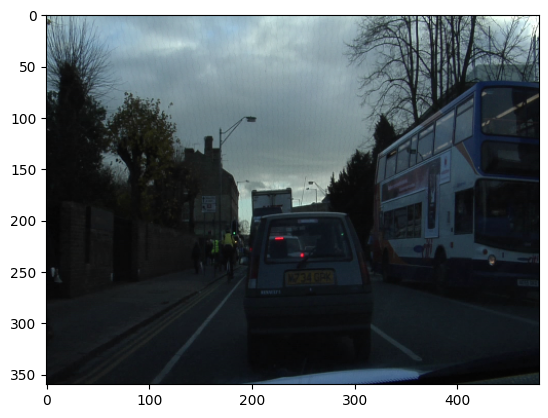

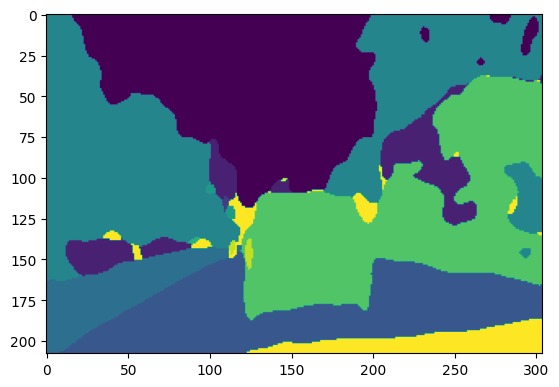

../datasets/archive/test/0001TP_009540.png
1/1 [==============================] - 0s 92ms/step


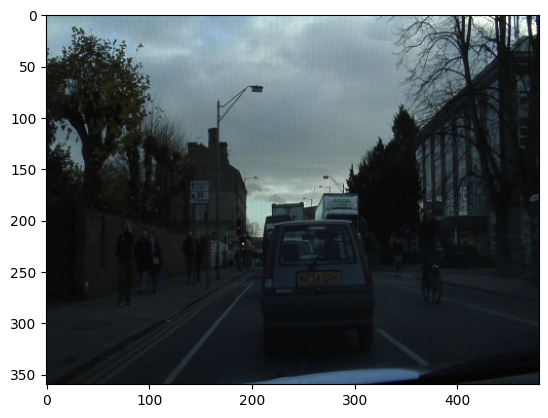

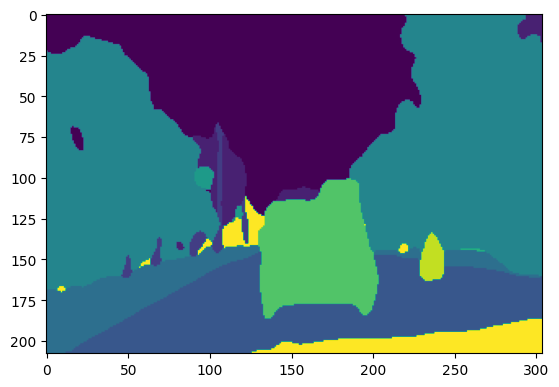

In [8]:
dir_path = '../datasets/archive/test/'
infer_dir(model_archive, dir_path,2)

## Model pretrained on "dataset1"

In [9]:
model_dataset1 = resnet50_segnet(n_classes=51 ,  input_height=416, input_width=608 ) 
model_dataset1.load_weights('pretrained/archive/model_resnet_1/')

../datasets/dataset1/images_prepped_test/0016E5_08123.png


2022-10-25 14:46:24.978114: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 611ms/step


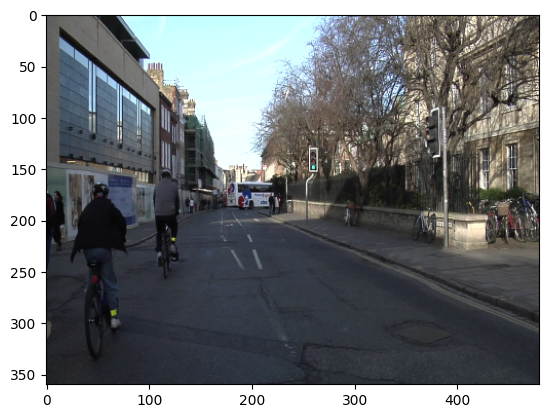

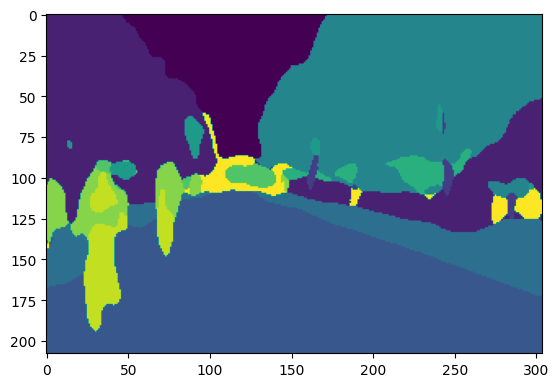

../datasets/dataset1/images_prepped_test/0016E5_08137.png
1/1 [==============================] - 0s 95ms/step


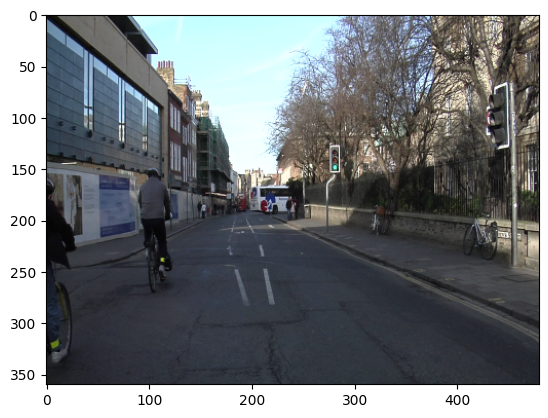

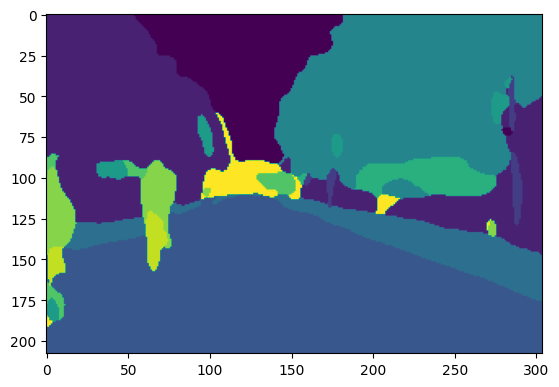

In [10]:
dir_path = '../datasets/dataset1/images_prepped_test/'
infer_dir(model_dataset1, dir_path,2)

../datasets/dataset1/images_prepped_test/0016E5_08137.png
1/1 [==============================] - 0s 102ms/step


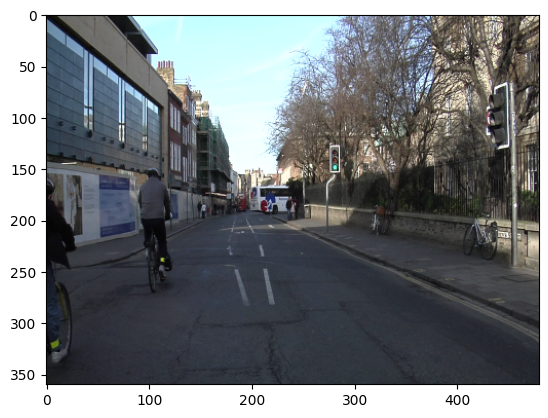

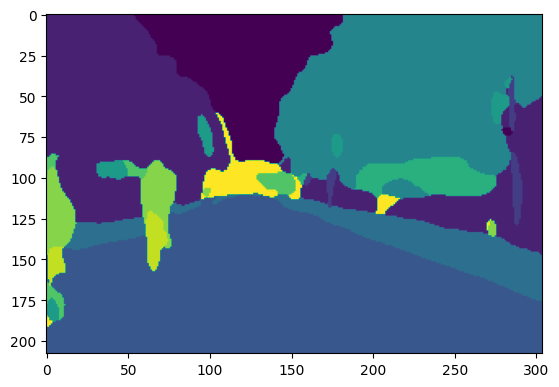

../datasets/dataset1/images_prepped_test/0016E5_08123.png
1/1 [==============================] - 0s 95ms/step


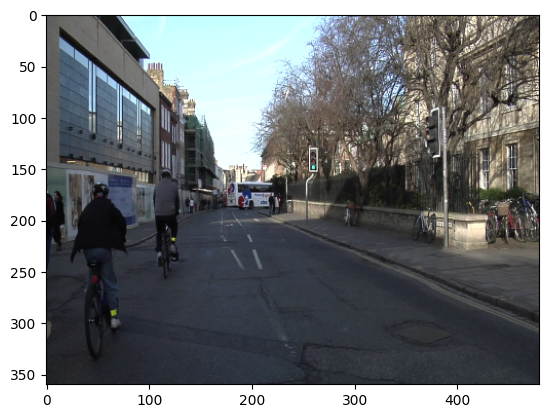

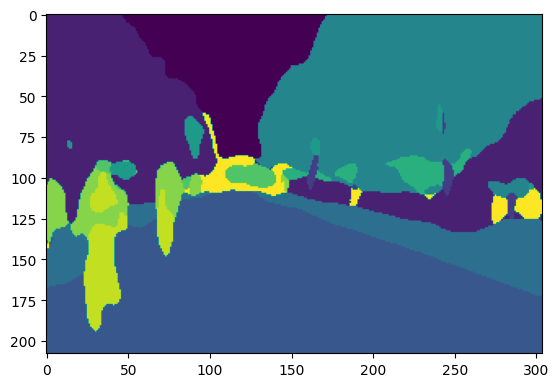

In [11]:
infer_dir(model_archive, dir_path,2)

../datasets/dataset1/images_prepped_test/0016E5_08123.png
1/1 [==============================] - 0s 98ms/step


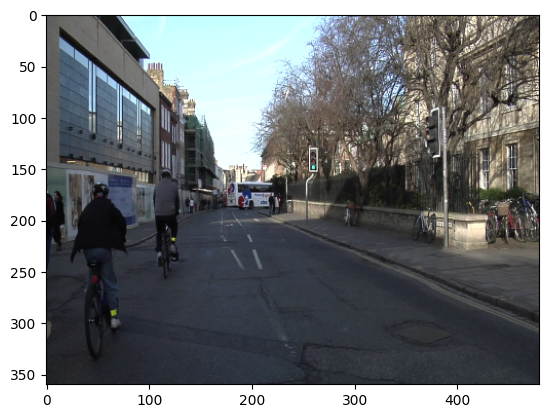

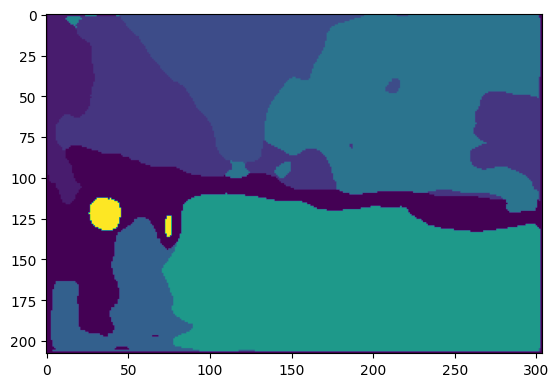

../datasets/dataset1/images_prepped_test/0016E5_08137.png
1/1 [==============================] - 0s 86ms/step


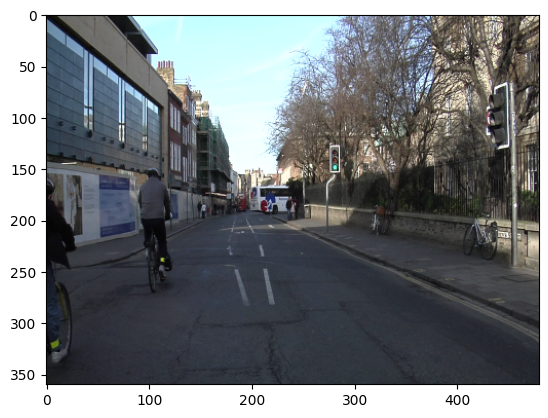

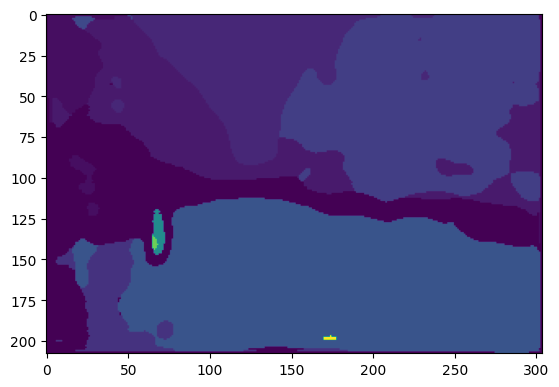

In [12]:
infer_dir(model_ade, dir_path,2)